In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import classification_report


In [2]:
train_path = r"C:\Users\18138\Desktop\data anly\Training Image sp 23"

In [3]:
train_clsname = [name for name in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, name))]

In [4]:
img_size = 128

In [5]:
# intialize the training data
train_data = [] 
label = 0
while label < len(train_clsname):
    category = train_clsname[label]
    print(label)
    print(category)
    path = os.path.join(train_path, category)
    img_name_index = 0
    while img_name_index < len(os.listdir(path)):
        img_name = os.listdir(path)[img_name_index]
        img_path = os.path.join(path, img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            train_data.append([img_arr, label])
        img_name_index += 1
    label += 1

0
Adult
1
Airplane
2
Alpaca
3
Bird
4
Bus
5
Car
6
Cat
7
Child
8
Elephant
9
Flower
10
Giraffe
11
Horse
12
Monkey
13
Panda
14
Reptile
15
Vessel


In [6]:
random.shuffle(train_data)

In [7]:
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [8]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [9]:
train_features = []
train_labels = []
for img, label in train_data:
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16.predict(img)
    features = np.reshape(features, (-1,))
    train_features.append(features)
    train_labels.append(label)

valid_features = []
valid_labels = []
for img, label in valid_data:
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16.predict(img)
    features = np.reshape(features, (-1,))
    valid_features.append(features)
    valid_labels.append(label)


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 172ms/step


In [10]:
clf = SVC(kernel='rbf',gamma='scale',C=1,decision_function_shape='ovr')
clf.fit(train_features, train_labels)

SVC(C=1)

In [11]:
valid_pred = clf.predict(valid_features)
valid_acc = accuracy_score(valid_labels, valid_pred)

In [12]:
print(f"Validation accuracy: {valid_acc}")

Validation accuracy: 0.842391304347826


In [13]:
print(classification_report(valid_labels, valid_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.88      0.92      0.90        24
           2       0.90      0.78      0.84        23
           3       1.00      0.74      0.85        19
           4       0.95      0.83      0.88        23
           5       0.85      0.85      0.85        27
           6       0.94      0.89      0.91        36
           7       0.67      0.31      0.42        13
           8       1.00      0.90      0.95        21
           9       0.86      1.00      0.92        18
          10       0.82      0.82      0.82        28
          11       1.00      0.82      0.90        17
          12       0.73      0.88      0.80        25
          13       0.93      0.89      0.91        28
          14       0.77      0.74      0.76        23
          15       0.73      0.96      0.83        25

    accuracy                           0.84       368
   macro avg       0.85   

In [14]:
import joblib
joblib.dump(clf, 'svm_classifier_model.pkl')

['svm_classifier_model.pkl']

In [15]:
clf = joblib.load('svm_classifier_model.pkl')

In [16]:
test_path = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"

In [17]:
test_clsname = [name for name in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, name))]

In [18]:
img_size = 128

In [19]:
# # initialize the test data
# test_data = [] 
# label = 0
# while label < len(test_clsname):
#     category = test_clsname[label]
#     print(label)
#     print(category)
#     path = os.path.join(test_path, category)
#     img_name_index = 0
#     while img_name_index < len(os.listdir(path)):
#         img_name = os.listdir(path)[img_name_index]
#         img_path = os.path.join(path, img_name)
#         if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
#             img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
#             img_arr = cv2.resize(img_arr, (img_size, img_size))
#             test_data.append([img_arr, label,img_name])
#         img_name_index += 1
#     label += 1

In [20]:
test_data = [] 
label = 0
test_labels = []
while label < len(test_clsname):
    category = test_clsname[label]
    print(label)
    print(category)
    path = os.path.join(test_path, category)
    img_name_index = 0
    while img_name_index < len(os.listdir(path)):
        img_name = os.listdir(path)[img_name_index]
        img_path = os.path.join(path, img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            test_data.append([img_arr, label,img_name])
            test_labels.append(label)
            img_name_index += 1
    label += 1



0
Adult
1
Airplane
2
Alpaca
3
Bird
4
Bus
5
Car
6
Cat
7
Child
8
Elephant
9
Flower
10
Giraffe
11
Horse
12
Monkey
13
Panda
14
Reptile
15
Vessel


In [21]:
random.shuffle(test_data)

In [22]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [23]:
test_features = []
test_labels = []
for img, label,img_name in test_data:
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16.predict(img)
    features = np.reshape(features, (-1,))
    test_features.append(features)
    test_labels.append(label)

1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 199ms/step


1/1 [==============================] - 0s 202ms/step


1/1 [==============================] - 0s 196ms/step


In [24]:
test_pred = clf.predict(test_features)
test_acc = accuracy_score(test_labels, test_pred)
print(f"test accuracy: {test_acc}")

test accuracy: 0.8604166666666667


In [25]:
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.97      0.93      0.95        30
           2       0.83      0.80      0.81        30
           3       0.85      0.73      0.79        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.81      0.73      0.77        30
           7       0.79      0.77      0.78        30
           8       0.89      0.83      0.86        30
           9       1.00      0.93      0.97        30
          10       0.76      0.87      0.81        30
          11       0.92      0.77      0.84        30
          12       0.71      0.80      0.75        30
          13       0.82      0.93      0.87        30
          14       0.86      0.83      0.85        30
          15       0.91      1.00      0.95        30

    accuracy                           0.86       480
   macro avg       0.86   

In [26]:
test_pred

array([10,  3, 12,  7,  9,  7,  7, 11,  1, 15, 15,  9,  4,  4, 10,  3, 11,
        7,  7,  6, 13, 11,  0, 13,  1,  5,  6,  8, 14,  5,  2,  9,  1, 14,
        8,  6,  8, 11, 14, 10,  5,  7,  7, 15,  3,  4,  8,  1,  1,  6, 15,
        4,  3, 13, 10, 10,  8,  4,  5, 12, 10,  1, 12, 14,  3,  9,  1,  2,
        8,  9,  5, 14,  0,  0, 15, 15,  9,  9,  5, 15,  2,  1,  5, 15, 14,
       14, 10, 11,  1, 10, 12, 14,  6,  4,  9,  4,  4, 13, 11,  3,  0, 10,
       11, 13,  7, 13, 11, 11, 15, 12, 12,  6,  4,  5,  3,  8,  0, 13,  2,
       13, 13,  6,  2,  9,  4,  2, 10,  1,  5,  0,  5, 14,  3,  4,  0, 11,
        8,  0,  1,  9,  8,  9,  1,  0, 14, 14,  8,  2, 15,  0, 10,  0,  3,
        5,  7,  6,  5, 12, 14, 12,  5, 11,  5, 11, 13, 13,  7, 15,  1,  3,
       13,  6, 11,  2,  6,  5,  2, 11, 13, 14,  5,  3,  1,  5,  2,  3,  3,
       12,  2,  9, 11,  2,  0,  9,  8,  4,  2,  7,  2, 14,  4,  3, 12,  2,
       10,  6,  5,  5,  0, 12,  6,  7, 10, 14,  7, 10, 12, 14,  5,  2,  6,
        5,  3, 13,  4, 15

In [27]:
test_label=[i[1] for i in test_data]
print(test_label)

[10, 3, 14, 7, 9, 7, 7, 2, 1, 1, 15, 9, 4, 4, 10, 3, 2, 0, 7, 6, 13, 11, 0, 13, 1, 5, 6, 8, 14, 5, 2, 9, 1, 3, 8, 11, 11, 11, 14, 3, 5, 7, 7, 15, 3, 4, 8, 1, 1, 6, 10, 4, 3, 13, 10, 10, 8, 4, 5, 12, 12, 1, 12, 14, 3, 9, 1, 2, 8, 9, 5, 14, 7, 1, 15, 15, 9, 9, 5, 15, 2, 1, 5, 15, 14, 14, 10, 11, 1, 10, 12, 14, 6, 4, 9, 4, 4, 6, 11, 3, 12, 13, 11, 13, 6, 13, 11, 11, 15, 12, 12, 6, 4, 5, 3, 8, 0, 13, 12, 13, 6, 6, 2, 9, 4, 2, 10, 1, 5, 0, 5, 3, 11, 4, 0, 11, 8, 0, 1, 9, 8, 9, 1, 0, 14, 14, 8, 10, 15, 0, 10, 0, 6, 5, 7, 6, 5, 12, 14, 3, 5, 11, 5, 11, 13, 13, 7, 15, 1, 3, 13, 6, 11, 2, 6, 5, 2, 11, 13, 14, 5, 3, 1, 5, 2, 3, 3, 12, 2, 9, 11, 2, 0, 9, 8, 4, 2, 7, 2, 14, 4, 3, 8, 2, 10, 6, 5, 5, 0, 12, 9, 7, 10, 6, 7, 8, 12, 14, 5, 8, 6, 5, 3, 13, 4, 15, 9, 7, 4, 8, 12, 12, 10, 7, 11, 13, 8, 0, 14, 8, 7, 7, 5, 4, 4, 0, 7, 12, 15, 9, 5, 1, 0, 7, 2, 1, 2, 4, 1, 11, 2, 0, 9, 15, 3, 10, 9, 12, 3, 1, 7, 8, 0, 14, 12, 13, 14, 2, 12, 0, 14, 12, 15, 2, 6, 10, 7, 11, 6, 9, 8, 0, 1, 0, 4, 4, 7, 7, 6, 15,

In [28]:
test_imgname=[i[2] for i in test_data]
print(test_imgname)

['test_giraffe (8).jpg', 'test_bird (8).jpg', 'test_reptile (29).jpg', 'test_child (3).jpg', 'test_flower (16).jpg', 'test_child (22).jpg', 'test_child (13).jpg', 'test_alpaca (19).jpg', 'test_airplane (26).jpg', 'test_airplane (18).jpg', 'test_vessel (15).jpg', 'test_flower (29).jpg', 'test_bus (10).jpg', 'test_bus (1).jpg', 'test_giraffe (18).jpg', 'test_bird (3).jpg', 'test_alpaca (30).jpg', 'test_adult (27).jpg', 'test_child (24).jpg', 'test_cat (23).jpg', 'test_panda (25).jpg', 'test_horse (18).jpeg', 'test_adult (12).jpg', 'test_panda (2).jpg', 'test_airplane (5).jpg', 'test_car (4).jpg', 'test_cat (30).jpg', 'test_elephant (18).jpg', 'test_reptile (5).jpg', 'test_car (7).jpg', 'test_alpaca (20).jpg', 'test_flower (25).jpg', 'test_airplane (15).jpg', 'test_bird (12).jpg', 'test_elephant (25).jpg', 'test_horse (2).jpeg', 'test_horse (26).jpg', 'test_horse (13).jpeg', 'test_reptile (27).jpg', 'test_bird (6).jpg', 'test_car (6).jpg', 'test_child (9).jpg', 'test_child (15).jpg', 'tes

In [29]:
data = {'GIVEN TEST IMG': test_imgname, 'GIVEN TEST CLASS': test_label, 'PREDICTED CLASS': test_pred}
df = pd.DataFrame(data)
df.to_csv("SVM_pretrained.csv", index=False)

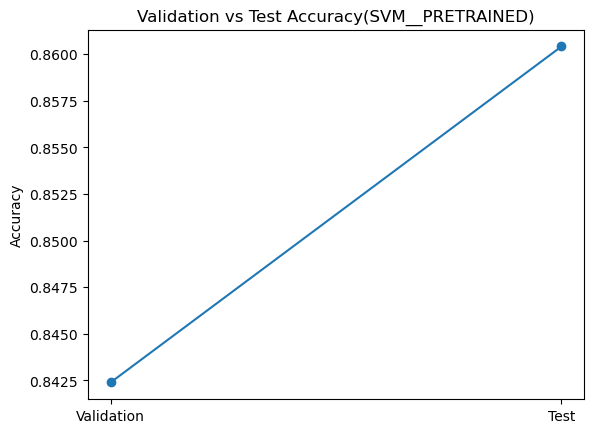

In [30]:
plt.plot([1, 2], [valid_acc, test_acc], marker='o')
plt.xticks([1, 2], ['Validation', 'Test'])
plt.ylabel('Accuracy')
plt.title('Validation vs Test Accuracy(SVM__PRETRAINED)')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels,test_pred)
print(cm)

[[25  0  0  0  0  0  0  4  0  0  0  0  1  0  0  0]
 [ 1 28  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0 24  0  0  0  0  0  1  0  2  2  1  0  0  0]
 [ 0  1  0 22  0  0  0  0  0  0  1  0  3  0  2  1]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 22  1  0  0  0  0  1  4  1  0]
 [ 5  0  0  0  0  0  1 23  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  0  0  0 25  0  2  0  1  0  0  0]
 [ 1  0  0  0  0  0  1  0  0 28  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2  0  0  0 26  0  0  0  0  1]
 [ 2  0  0  1  0  0  1  0  2  0  0 23  0  1  0  0]
 [ 1  0  2  0  0  0  0  0  0  0  2  0 24  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  0 28  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  3  0 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]
